<a href="https://colab.research.google.com/github/vaidande/70-Sports-Image-Classification-InceptionV3/blob/main/70_Sports_Image_Classification_InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
from glob import glob

In [6]:
dataset url: https://www.kaggle.com/gpiosenka/sports-classification
IMAGE_SIZE = [224, 224]
 
train_path = '/content/gdrive/MyDrive/kaggle_dataset/70 Sports Image Classification/train'
valid_path = '/content/gdrive/MyDrive/kaggle_dataset/70 Sports Image Classification/test'

In [7]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)#+ [3]: No. of channels.(RGB)
                                                                                            #weights='imagnet': retrives the same weights which where used in the ImageNet competition.
                                                                                            #include_top=False: removes the default VGG16 input, Flatten and Output layer.

87916544/87910968 [==============================] - 1s 0us/step


In [8]:
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [9]:
#don't train existing weights.
for layer in inception.layers:
  layer.trainable = False

In [10]:
#useful for getting no. of output classes.
folders = glob('/content/gdrive/MyDrive/kaggle_dataset/70 Sports Image Classification/train/*')

In [11]:
#adding Flatten layer..
x = Flatten()(inception.output)

In [12]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
#Data Augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/70 Sports Image Classification/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/kaggle_dataset/70 Sports Image Classification/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 10082 images belonging to 70 classes.
Found 350 images belonging to 70 classes.


In [17]:
r = model.fit_generator(training_set,
                        validation_data=test_set,
                        epochs=20,
                        steps_per_epoch=len(training_set),
                        validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
316/316 [==============================] - 200s 523ms/step - loss: 12.0405 - accuracy: 0.4553 - val_loss: 3.4872 - val_accuracy: 0.7743
Epoch 2/20
316/316 [==============================] - 160s 507ms/step - loss: 4.3032 - accuracy: 0.7610 - val_loss: 5.2347 - val_accuracy: 0.7857
Epoch 3/20
316/316 [==============================] - 161s 509ms/step - loss: 4.0251 - accuracy: 0.8125 - val_loss: 2.4959 - val_accuracy: 0.8514
Epoch 4/20
316/316 [==============================] - 162s 513ms/step - loss: 2.3974 - accuracy: 0.8709 - val_loss: 3.6574 - val_accuracy: 0.8771
Epoch 5/20
316/316 [==============================] - 161s 509ms/step - loss: 2.4108 - accuracy: 0.8887 - val_loss: 5.1738 - val_accuracy: 0.8314
Epoch 6/20
316/316 [==============================] - 162s 513ms/step - loss: 2.5941 - accuracy: 0.8887 - val_loss: 2.8547 - val_accuracy: 0.8829
Epoch 7/20
316/316 [==============================] - 160s 507ms/step - loss: 2.0231 - accuracy: 0.9141 - val_loss: 2.7779 

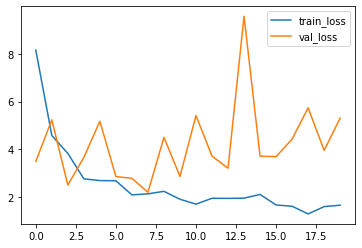

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.savefig('Loss_ValLoss')

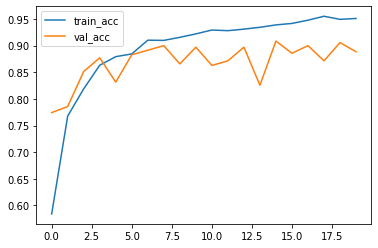

<Figure size 432x288 with 0 Axes>

In [20]:
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()
plt.savefig('Acc_ValAcc')

In [21]:
from tensorflow.keras.models import load_model
model.save('/content/gdrive/MyDrive/kaggle_dataset/70 Sports Image Classification/model/model_inception.h5')

In [22]:
y_pred = model.predict(test_set)

In [23]:
y_pred = np.argmax(y_pred, axis = 1)

In [24]:
y_pred

array([ 4, 35, 39, 69, 12, 26, 69, 56, 62, 64, 16,  5, 49, 31, 29, 41, 10,
       69, 21, 35, 60, 19, 29, 51, 27, 11, 34, 24, 60, 65, 63, 40, 39,  9,
        4, 17, 68, 47, 66, 11, 28, 19, 27, 58, 24, 21, 45, 67, 53, 40, 52,
       53, 43, 10, 10, 35,  3, 62, 47, 18, 45, 50, 14, 25,  2, 23, 23, 30,
       69, 60, 51, 26, 68, 60, 54, 41, 18,  4, 40, 44, 54, 15, 34, 41,  1,
       31, 39, 57,  1, 20, 30, 41, 18, 20, 39, 68, 49, 49, 67, 59, 59, 53,
       18, 21, 26, 29, 64, 48,  7, 17, 66, 35, 55, 41, 45, 50, 41, 22,  6,
        6, 60, 61, 40, 52, 34, 53, 45, 23, 52, 34, 11, 65,  9, 20, 63, 14,
       36,  7, 27,  9, 61, 16, 28, 18, 48, 10,  5, 48,  4,  8,  0, 54, 25,
       43, 65, 55, 58,  9,  7, 67, 23, 27, 12, 69,  0, 33, 10, 13, 37, 69,
       35, 38, 12, 34, 26, 22, 20, 30, 23, 25, 37, 24, 22, 57, 60,  7, 30,
       64, 58, 33, 23, 15,  2, 19, 57, 55, 14, 57, 54, 51, 65, 30, 62, 46,
       13, 19, 49, 37, 35,  0, 69,  3, 56, 45, 32, 40, 36, 62,  2, 66, 62,
       32, 66, 13, 68,  8

In [29]:
x=image.load_img('/content/gdrive/MyDrive/kaggle_dataset/70 Sports Image Classification/valid/archery/1.jpg',target_size=(224,224))

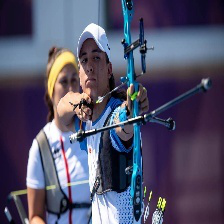

In [30]:
x

In [31]:
test_img = image.img_to_array(x)
test_img = test_img/255
test_img = np.expand_dims(test_img, axis = 0)
result = model.predict(test_img)

In [32]:
a=np.argmax(result, axis=1)

In [33]:
a #0: air hockey, 1: archery, 2: balance team, 3: baseball and more..

array([1])